<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/BigData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorboard

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/TrueValues'
X_data = []
x2_data=[]
Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim
    x2_data.append(data[:, 0:])
    Y_labels.append(1)








false_folder = '/content/KUL/BigData/FalseValues'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim
    x2_data.append(data[:, 0:])
    Y_labels.append(0)




X_data = np.array(X_data)
Y_labels = np.array(Y_labels)
x2_data=np.array(x2_data)
print("x_data shape: ",X_data.shape)
# X_data=X_data,x2_data
X_data



Cloning into 'KUL'...
remote: Enumerating objects: 94527, done.
remote: Counting objects: 100% (23959/23959), done.
remote: Compressing objects: 100% (2201/2201), done.
remote: Total 94527 (delta 21755), reused 23955 (delta 21754), pack-reused 70568
Receiving objects: 100% (94527/94527), 109.00 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (92065/92065), done.
Updating files: 100% (28125/28125), done.
x_data shape:  (2000, 1000, 1)


array([[[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       ...,

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]],

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [191.11240651],
        [200.79717031]],

       [[201.32509767],
        [201.29264308],
        [201.2567427 ],
        ...,
        [201.05048642],
        [200.92746245],
        [200.79717031]]])

In [20]:
# Verileri düzenleme ve normalleştirme
num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data.reshape(num_samples, sequence_length * num_features)

# Eğitim ve test setlerine bölme


X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

print("X_train.shape:",X_train.shape)
X_train

X_train.shape: (1600, 1000)


array([[201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       ...,
       [201.32509767, 201.99802357, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [201.32509767, 201.29264308, 201.2567427 , ..., 201.05048642,
        200.92746245, 200.79717031],
       [194.22491762, 201.29264308, 201.2567427 , ..., 196.49646945,
        200.92746245, 200.79717031]])

In [21]:

print(y_train.shape)
y_train

(1600,)


array([1, 1, 1, ..., 1, 0, 0])

#deneme

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Verileri uygun şekilde düzenleme ve ölçeklendirme
X_train = np.expand_dims(X_train, axis=-1)
y_train = np.array(y_train)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1000, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
40/40 [==============================] - 3s 58ms/step - loss: 16.6818 - accuracy: 0.5109 - val_loss: 6.9807 - val_accuracy: 0.4500
Epoch 2/10
40/40 [==============================] - 1s 34ms/step - loss: 3.8073 - accuracy: 0.5023 - val_loss: 5.9398 - val_accuracy: 0.4500
Epoch 3/10
40/40 [==============================] - 1s 30ms/step - loss: 2.1482 - accuracy: 0.5008 - val_loss: 0.7153 - val_accuracy: 0.5594
Epoch 4/10
40/40 [==============================] - 1s 19ms/step - loss: 0.7248 - accuracy: 0.5117 - val_loss: 0.7084 - val_accuracy: 0.4469
Epoch 5/10
40/40 [==============================] - 1s 20ms/step - loss: 0.7319 - accuracy: 0.5672 - val_loss: 0.9683 - val_accuracy: 0.4500
Epoch 6/10
40/40 [==============================] - 1s 16ms/step - loss: 0.7581 - accuracy: 0.5562 - val_loss: 0.8551 - val_accuracy: 0.4500
Epoch 7/10
40/40 [==============================] - 1s 20ms/step - loss: 0.6860 - accuracy: 0.6016 - val_loss: 0.7107 - val_accuracy: 0.5562
Epoch 8/10
4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from datetime import datetime


# TensorBoard için bir log dizini oluşturun
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"TensorBoard Link: https://tensorboard.dev/experiment/{log_dir}")

# TensorBoard Callback'ini oluşturun
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Model oluşturma
model = Sequential()
model.add(Flatten(input_shape=(1000, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# Model derleme
model.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['mse','accuracy'])

# Model özetini yazdırma
model.summary()

# Modeli eğitme ve TensorBoard geri çağırımını kullanma
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])

# Diğer değerlendirmeleri yapma ve sonuçları yazdırma
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_mse}, Test Accuracy: {test_acc}')

# Model özetini yazdırma
model.summary()

# Test seti üzerinde tahminler yapma
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Tahmin edilen sınıfları ve olasılıkları yazdırma
for i in range(5):
    print(f"Actual Class: {y_test[i]}, Predicted Class: {y_pred_classes[i]}, Probabilities: {y_pred_probabilities[i]}")



log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(X_train, y_train, epochs=60, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])
%load_ext tensorboard
%tensorboard --logdir logs/fit





# confusion matrix

10/10 [==============================] - 0s 14ms/step


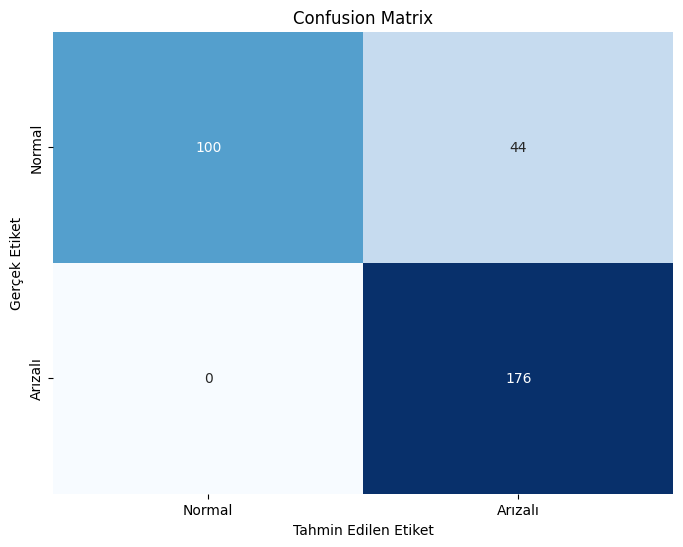


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       144
           1       0.80      1.00      0.89       176

    accuracy                           0.86       320
   macro avg       0.90      0.85      0.85       320
weighted avg       0.89      0.86      0.86       320



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini alın
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix hesaplayın
cm = confusion_matrix(y_test, y_pred_binary)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Arızalı'], yticklabels=['Normal', 'Arızalı'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_binary))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Modelin tahminlerini alın
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  # Eşik değeri üzerinden sınıflara dönüştürme

# Confusion matrix oluşturun
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix'i seaborn ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# !git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder = '/content/KUL/BigData/TrueValues'
X_data1 = []
X_data2 = []

Y_labels = []
Y_labels2 = []


for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data1.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/BigData/FalseValues'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data2.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels2.append(0)

X_data1 = np.array(X_data1)
X_data2 = np.array(X_data2)

Y_labels = np.array(Y_labels)
Y_labels2 = np.array(Y_labels2)


# new


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Verileri uygun şekilde düzenleme ve ölçeklendirme
X_train = np.expand_dims(X_train, axis=-1)
y_train = np.array(y_train)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1000, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
40/40 [==============================] - 2s 30ms/step - loss: 29.0441 - accuracy: 0.4977 - val_loss: 4.0627 - val_accuracy: 0.4500
Epoch 2/100
40/40 [==============================] - 1s 22ms/step - loss: 3.8064 - accuracy: 0.4789 - val_loss: 12.8297 - val_accuracy: 0.5500
Epoch 3/100
40/40 [==============================] - 1s 20ms/step - loss: 5.5996 - accuracy: 0.5008 - val_loss: 2.8576 - val_accuracy: 0.5500
Epoch 4/100
40/40 [==============================] - 1s 22ms/step - loss: 7.7351 - accuracy: 0.5133 - val_loss: 2.4355 - val_accuracy: 0.5500
Epoch 5/100
40/40 [==============================] - 1s 22ms/step - loss: 4.4902 - accuracy: 0.4898 - val_loss: 6.3633 - val_accuracy: 0.4500
Epoch 6/100
40/40 [==============================] - 1s 22ms/step - loss: 1.8877 - accuracy: 0.4742 - val_loss: 0.6788 - val_accuracy: 0.5813
Epoch 7/100
40/40 [==============================] - 1s 20ms/step - loss: 1.1812 - accuracy: 0.5141 - val_loss: 2.2257 - val_accuracy: 0.5500
Epoc

# confusion matrix

10/10 [==============================] - 1s 23ms/step


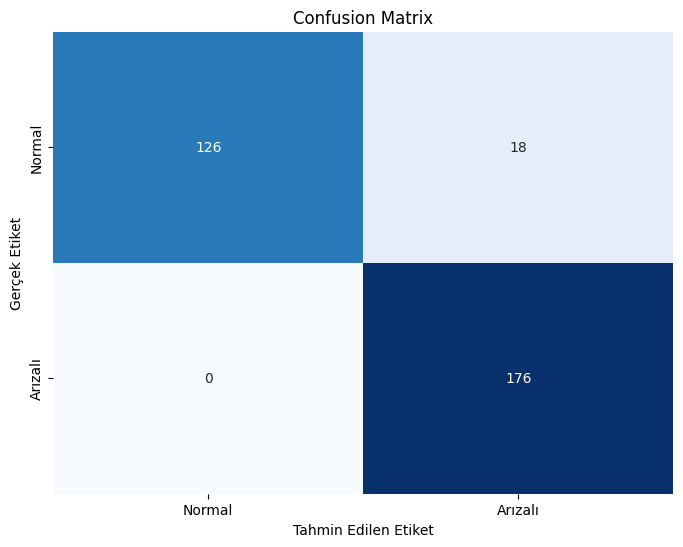


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93       144
           1       0.91      1.00      0.95       176

    accuracy                           0.94       320
   macro avg       0.95      0.94      0.94       320
weighted avg       0.95      0.94      0.94       320



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini alın
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix hesaplayın
cm = confusion_matrix(y_test, y_pred_binary)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Arızalı'], yticklabels=['Normal', 'Arızalı'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_binary))
